***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [5. Imaging](5_0_introduction.ipynb)  
    * Previous: [5. Introduction](5_0_introduction.ipynb)  
    * Next: [5.2 Sampling and Point Spread Functions](5_2_sampling_functions_and_psfs.ipynb)

***

Import standard modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import section specific modules:

In [3]:
import matplotlib.image as mpimg

***

## 5.1 Spatial Frequencies<a id='imaging:sec:spatial'></a>

To first approximation, the observed sky and sampled visibilites have a Fourier pair relationship, that is the Fourier Transform of the sampled visibilites is an image of the observed sky, and the Fourier Transform of the observed sky image is the sampled visibilities. Before we dive into specifics of radio interferometric imaging using aperture synthesis, we will cover the ideas which relate the spatial domain (i.e. an image) to the spatial frequency domain (i.e. the visibilities). To do this we will start with the Fourier transform which is the mathematics that relate the two domains. Using that framework we will transform simple signals between the two domains to understand how the a signal in one domain appears in the other. This is the groundwork we need to understand before we can start constructing sky images from the observed visibilities of an interferometric array.

### 5.1.1 The Fourier Transform in Two Dimensions<a id='imaging:sec:ft2d'></a>

We will start with a bit of mathematics, but will soon move to some visual examples which are often more useful to get started to learn about Fourier transforms.

As described in Section [EXREF](BLAH) the Fourier Transform of a continuous, 1-dimensional function $f(x)$ is

$$g(t) = \int_{-\infty}^{\infty} f(x) e^{-2\pi i xt} dx$$

The discrete Fourier transform (DFT) of a discrete, 1-dimensional function $f(x)$ is

$$g(t) = \sum_{-\infty}^{\infty} f(x) e^{-2\pi i xt} dx$$

The notation $g \rightleftharpoons f$ denotes that the function $f$ and $g$ are Fourier pairs, that is if $g$ is the Fourier transform of $f$, then $f$ is the inverse Fourier transform of $g$.

A 2-dimensional Fourier transform is simply the product of the Fourier Transform in each dimension (assuming each dimension is orthogonal).

$$ I(l,m) = \int_{-\infty}^{\infty} V_u(u) e^{-2\pi iul} \,du \int_{-\infty}^{\infty} V_v(v) e^{-2\pi ivm} \, dv = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} V(u,v) e^{-2\pi i(ul+vm)} \,du\,dv $$

By Euler's forumla, $e^{ix} = \cos x + i \sin x$, this can be expanded to

$$ I(l,m) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} V(u,v) (\cos(2\pi(ul+vm)) - i\sin(2\pi(ul+vm))) \,du\,dv $$

If $I(l,m)$ represents an image, i.e. a discrete 2-dimensional function, then we see that $I(l,m)$ can be represented as the Fourier Transform of the visibilities $V(u,v)$. By Euler's formula the Fourier Transform is the decomposition of the visibilties into sine and cosine functions.

<a id="eq:dft2_IV"></a>
$$ I(l,m) = \sum_{u=-\infty}^{\infty} \sum_{v=-\infty}^{\infty} V(u,v) (\cos(2\pi(ul+vm)) - i\sin(2\pi(ul+vm))) \,\Delta u\,\Delta v $$

As the image-visibility relation can be approximated as a Fourier pair $I \rightleftharpoons V$, the visibilities $V(u,v)$ can be described as the sine/cosine decomposition of the image $I(l,m)$

<a id="eq:dft2_VI"></a>
$$ V(u,v) = \sum_{l=-1}^{1} \sum_{m=-1}^{1} I(l,m) (\cos(2\pi(ul+vm)) + i\sin(2\pi(ul+vm))) \,\Delta l\,\Delta m $$

The approximation of the relation between the image and visibilities is fundamental to using interferometry for aperture synthesis. There are mony ways to interpret this relationship. A useful idea is that the sky is made up of mostly 'point source' objects which one might call stars or galaxies or blobs. What ever these are, they are 'unresolved' sources or *delta functions*. Equation [INREF](#eq:dft2_VI) states that a delta function in an image is a complex wave in the visibility domain and vica-versa. This means that one does not need to fully sample the visibility space to detect a point source in the image domain. Put in other words, this is an issue a signal being sparse in one domain (image) and dense in another domain (visibility). It is to our advantage to make a measurement in a domain where the signal is spread through-out the space and then transform the observed signal into a more preferable domain.

To understand this concept which is the core of interferometric imaging lets look at a few examples which will hopefully start to create some intuition about the image-visibility Fourier relationship.

### 5.1.2 The Fourier Transform of an Image<a id='imaging:sec:ftImage'></a>

Let us start by looking at the effect applying a Fourier Transform to an image. Note, through out this section we will be using the Fast Fourier Transform. This function will be discussed later in the Gridding Section of this Chapter [EXREF](3_gridding_and_degridding_for_the_fft.ipynb#imaging:sec:grid) \ref{imaging:sec:grid}, for now we will only use a regularly sample (i.e gridded) signal.

Let us start by loading some generic images, the first is a painting by Umberto Boccioni called *Dynamism of a Cyclist* and the other is a duck (well, one full male mallard and part of a female mallard).

In [4]:
#soccer = mpimg.imread('figures/WLA_moma_Umberto_Boccioni_Dynamism_of_a_Soccer_Player_1913_512.png')
cyclist = mpimg.imread('figures/Umberto_Boccioni_Dynamism_of_a_Cyclist_512.png')
duck = mpimg.imread('figures/Anas_platyrhynchos_male_female_quadrat_512.png')

For simplicity convert the RGB-color images to grayscale:

In [5]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b #standard grayscale conversion
    return gray

gCyclist = rgb2gray(cyclist)
gDuck = rgb2gray(duck)

Start by displaying the images in the *spatial domain*, i.e. the domain we usually look at images in. We use the term spatial domain to describe signals which are ordered by a distance which is directly related to the physical distance between the two signals, e.g. for the duck image below the eye is close to the head and far away from the foot as it is in the real world. This may seem like such a simple concept and you may wonder why the point is even being made. But, once we step into the *spatial frequency domain* our intution will be lost and we need to use the spatial domain relationship to try to regain our footing.

A useful metaphor here is to that of painting an image with a number different-sized paint brushes at different stroke angles. The painting is the spatial-domain images, and one can think of a point in the spatial-frequency domain as representing the amount of paint (in our case, a complex power) applied using a specific brush size at a specific stroke angle. In the spatial frequency domain, all points at the same radius represent the same sized paint brush but at all possible stroke angles. And, points further out represent smaller paint brushes (that is the brushes which can do fine details) compared to points closer to the centre which are for the large structures such as flat backgrounds. Additionally, not as much stroke angle control is required for the large paint brushes compared to the smaller brushes, so only a few points are need in the spatial frequency domain to fully represent a large brush.

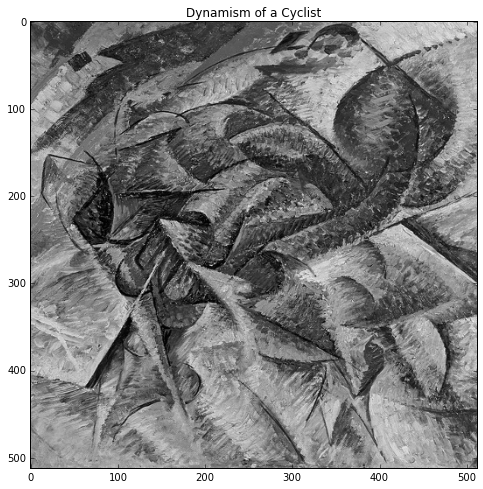

In [6]:
fig = plt.figure(figsize=(8,8))
plt.title('Dynamism of a Cyclist')
img0plot = plt.imshow(gCyclist)
img0plot.set_cmap('gray')
#fig.savefig("cyclist_gray.png", bbox_inches='tight', pad_inches=0)

*Figure: Dynamism of a Cyclist by Umberto Boccioni*

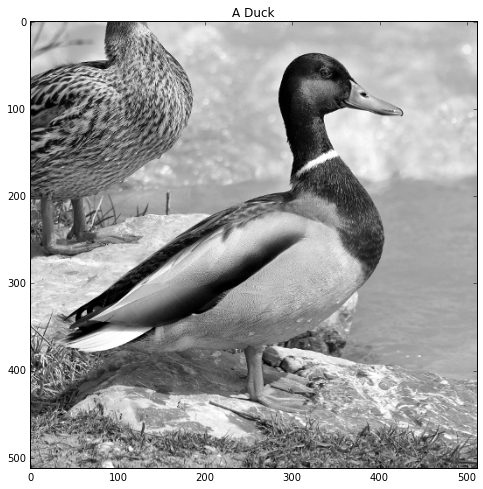

In [7]:
fig = plt.figure(figsize=(8,8))
plt.title('A Duck')
img1plot = plt.imshow(gDuck)
img1plot.set_cmap('gray')
#fig.savefig("duck_gray.png", bbox_inches='tight', pad_inches=0)

*Figure: A Duck*

With our eyes and visual learning to understand signals in the spatial domian these are clearly two different images. This may seem like an obvious point, of course they are very different images, but that is because we have learned to understand signals in the spatial domain very well.

The *spatial frequency domain* represents the decomposition of a spatial domain signal into complex oscillations using sine and cosine waves. In the next section we will look at some simple examples which hopefully provide some insight into this domain.

Now, let us take a step in the spatial frequency domain via a 2-dimensional Fourier Transform. This results in a complex 2-d array where the pixels closest to the centre of the array represent the low-frequency, or 'large-scale', structure of the original image. At the edge of the array are the high-frequency, or 'fine-scale', structure of the image. The high-frequency components represent the details of the image.

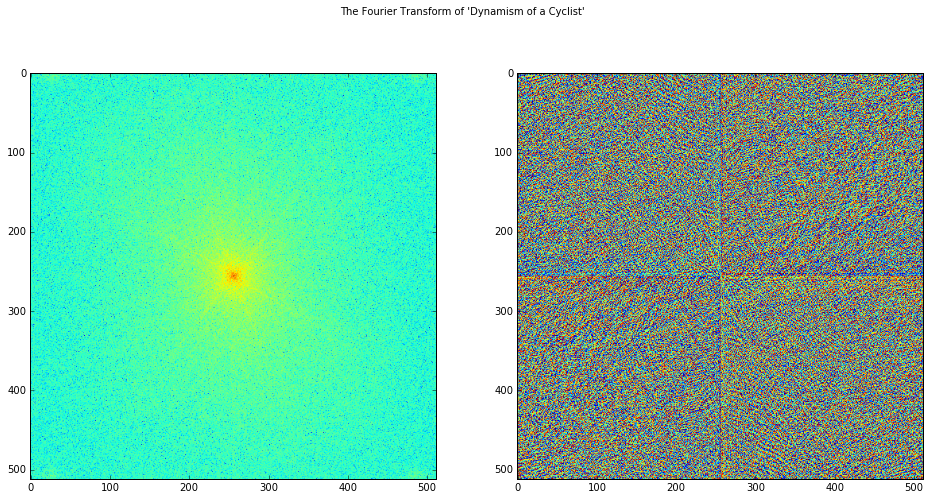

In [8]:
fftCyclist = np.fft.fftshift(np.fft.fft2(gCyclist))
fig, axes = plt.subplots(figsize=(16,8))
plt.suptitle('The Fourier Transform of \'Dynamism of a Cyclist\'')
plt.subplot(1,2,1)
plt.imshow( 10. * np.log10(np.abs(fftCyclist))) #amplitude (decibels)
plt.subplot(1,2,2)
plt.imshow( np.angle(fftCyclist)) #phase
#fig.savefig("soccer_fft_gray.png", bbox_inches='tight', pad_inches=0)

*Figure: Amplitude, in decibels, (left) and the phase (right) of the Fourier transform of 'Dynamism of a Cyclist'*

In [ ]:
fftDuck = np.fft.fftshift(np.fft.fft2(gDuck))
fig, axes = plt.subplots(figsize=(16,8))
plt.suptitle('The Fourier Transform of a Duck')
plt.subplot(1,2,1)
plt.imshow( 10. * np.log10(np.abs(fftDuck))) #amplitude (decibels)
plt.subplot(1,2,2)
plt.imshow(np.angle(fftDuck)) #phase
#fig.savefig("duck_fft_gray.png", bbox_inches='tight', pad_inches=0)

*Figure: Amplitude, in decibels, (left) and the phase (right) of the Fourier transform of a duck*

As can be seen in the amplitude figures the majority of the power is in the central region, i.e. the majority of the signal can be represented with large scale, or low-frequency sine and cosine waves. Try plotting the amplitudes without first rescaling them logarithmically and you should see only a few bright pixels in the middle of the figure. In the phase figures the values range from $-2\pi$ to $2\pi$ and are fairly random. There is some coherent structure that goes left to right and top to bottom passing through the centre of the figure. The main insight to gain from the phase figure is that given a complex image of say a duck leads to very complex phase structure.

An interesting question to consider is 'which is more important, amplitude or phase?' This seems like an odd question, because intuition would seem to indicate that both amplitude and phase information is needed. It turns out that phase information contains most of the structural information. Let us start by taking a look at what this means, and then get into why this is the case. Start by switching the phase information of the two images.

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.title('Hybrid image: amplitude (painting), phase (duck)')
phs = np.angle(fftDuck) #phase of the duck
amp = np.abs(fftCyclist) #amplitude of the painting
fftHybrid = amp * (np.cos(phs) + 1j * np.sin(phs)) #construct an image with the phase of a duck and amplitude of the painting
hybrid = np.abs(np.fft.ifft2(np.fft.fftshift(fftHybrid))) #compute the inverse Fourier Transform
hybridPlot = plt.imshow(hybrid)
hybridPlot.set_cmap('gray')
#fig.savefig("hybrid_phs_duck_amp_cyclist.png", bbox_inches='tight', pad_inches=0)

*Figure: 'Dynamism of a Duck', reconstructed hybrid image using the spatial frequency amplitudes of 'Dynamism of a Cyclist' and the phases of the duck.*

This seems kind of like an amazing thing to see, we have combined the two images and clearly we see a duck and not the painting. When we instead use the phase of the painting and the amplitude of the duck we now see the painting and not the duck.

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.title('Hybrid image: amplitude (duck), phase (painting)')
phs = np.angle(fftCyclist) #phase of the painting
amp = np.abs(fftDuck) #amplitude of the duck
fftHybrid = amp * (np.cos(phs) + 1j * np.sin(phs)) #construct an image with the phase of a painting and amplitude of the duck
hybrid = np.abs(np.fft.ifft2(np.fft.fftshift(fftHybrid))) #compute the inverse Fourier Transform
hybridPlot = plt.imshow(hybrid)
hybridPlot.set_cmap('gray')
#fig.savefig("hybrid_phs_soccer_amp_duck.png", bbox_inches='tight', pad_inches=0)

*Figure: 'Dynamism of a Duck (Redux)', reconstructed hybrid image using the spatial frequency amplitudes of the duck and the phases of 'Dynamism of a Cyclist'.*

Though with both hybrid images the image in which the phase is extracted from dominates they are not perfect reconstructions of only one image. In both there is now a sheen of noise across the images. The amplitude information plays a role. This noisiness of the hybrid image is due to the fact that the two original images are effectly uncorrelated, i.e. they are not related. So, one would not expect the amtplitude and phase information from one to match the other.

What would happen if instead of swapping the amplitude information of the duck for the painting we just set all the amplitude of all the pixels to one? That is, we effectively throw out any amplitude information and make a phase information-only image?

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.title('Duck (phase-only)')
phs = np.angle(fftDuck)
amp = 1.*np.ones_like(fftDuck) #set all the amplitude values to 1
fftPhsImg0 = amp * (np.cos(phs) + 1j * np.sin(phs))
phsImg0 = np.abs(np.fft.ifft2(np.fft.fftshift(fftPhsImg0)))
phsImg0Plot = plt.imshow(phsImg0)
phsImg0Plot.set_cmap('gray')
#fig.savefig("phs_only_duck.png", bbox_inches='tight', pad_inches=0)

*Figure: reconstructed image of a duck using only the phase information by setting all the amplitudes to unity.*

The duck is still visibale when we only use the phase information, but now we see something interesting. Only the fine details (i.e. the high-frequency structure) like the little feather and the outline are visible. We will get to this later in the chapter but by setting every ampltiude pixel to 1 we have created a *weighting function* which will favour the fine-scale or high-frequency structure in the image over the large-scale structure such as the background water.

Can we do the same trick with using only amplitude information, i.e. reconstruct the image after setting all the phases to zero?

In [ ]:
fig, axes = plt.subplots(figsize=(16,8))
plt.title('Duck (amplitude-only)')
phs = np.zeros_like(fftDuck) #set the phase information to 0
amp = np.abs(fftDuck)
fftAmpImg0 = amp

plt.subplot(1,2,1)
plt.title('Duck (amp-only)')
ampImg0 = np.abs(np.fft.fftshift(np.fft.ifft2(fftAmpImg0)))
ampImg0Plot = plt.imshow(ampImg0)
ampImg0Plot.set_cmap('gray')

plt.subplot(1,2,2)
plt.title('Duck (amp-only (dB))')
ampImg0deci = 10.*np.log10(np.abs(np.fft.fftshift(np.fft.ifft2(fftAmpImg0))))
ampImg0deciPlot = plt.imshow(ampImg0deci)
ampImg0deciPlot.set_cmap('gray')
#fig.savefig("amp_only_duck.png", bbox_inches='tight', pad_inches=0)

*Figure: reconstructed image of a duck using only the amplitude information by setting all the phases to zero. Left is in linear and right is in logarithmic (decibel) scale.*

As it turns out, using only the amplitude information results in an almost empty image with some power spread over the centre of the image. Taking the logarithm of the image results in something similar to the amplitude figure of the Fourier Transformed image shown earlier in the section. A way to think about the phase and amplitude information is that phase information describes the structure of an image, that is, where the power needs to be placed. And ampltiude information describes the intensity of that structure given a position.

This is an important idea that will come up again soon when we consider interferometric visibility sampling and weighting functions. You will see that we can play with the amplitudes to filter structure out of visibilities. But, we are getting ahead of ourselves here, time enough for that later.

As an aside what happens when we only use the real or imaginary information to reconstruct the image?

In [ ]:
fig, axes = plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Duck (real-only)')
fftRealImg1 = fftDuck.real
realImg1 = np.abs(np.fft.ifft2(fftRealImg1))
plt.imshow(realImg1)
plt.set_cmap('gray')

plt.subplot(1,2,2)
plt.title('Duck (imaginary-only)')
fftImagImg1 = 1j * fftDuck.imag
imagImg1 = np.abs(np.fft.ifft2(fftImagImg1))
plt.imshow(imagImg1)
plt.set_cmap('gray')

*Figure: reconstructed image of a duck using only the real components (left) and imaginary components (right).*

There seems to be a lot going on here, but the core of this effect is that the original image is strictly real-valued images. So, when the image is Fourier transformed the resulting signal is now twice as large because it is complex (there is a real and imaginary component at each point) but no new information has been created as it is a linear transform. The Fourier transformed signal is redundant along a diagonal access, each value above the diagonal has an equivalent (conjugated) value belong the diagonal. Now if only the real-component is used to inverse Fourier transform back to the spatial domain then this results in an image which is the sum of the original image and a $180^{\circ}$ rotated image, this is an addition because connjugation does not effect the sign of the real components. The imaginary-component image is the difference image of the original and a $180^{\circ}$ rotated image because the conjugation flips the imaginary sign.

The idea with this section has been to start with an image with a significant amount of structure (or information) which we can understand and then to transform that image into a new domain where our intution is lost. And, you may still be lost as we need to create some intution about the spatial frequency domain. In the next section we will start with simple structures to see how we can build up images out of basic components.

### 5.1.3 The Fourier Transform of a Point Source<a id='imaging:sec:ftPoint'></a>

Instead of looking at the Fourier Transform of an image with a large amount of structure lets examine a few simple images and the effect of applying a Fourier transform. The simpliest image one can make is an empty image with a single pixel, or what it is also called a *point source* as the source is not resolved, with intensity in the centre.

FFT Max: 1.0 Min: 1.0


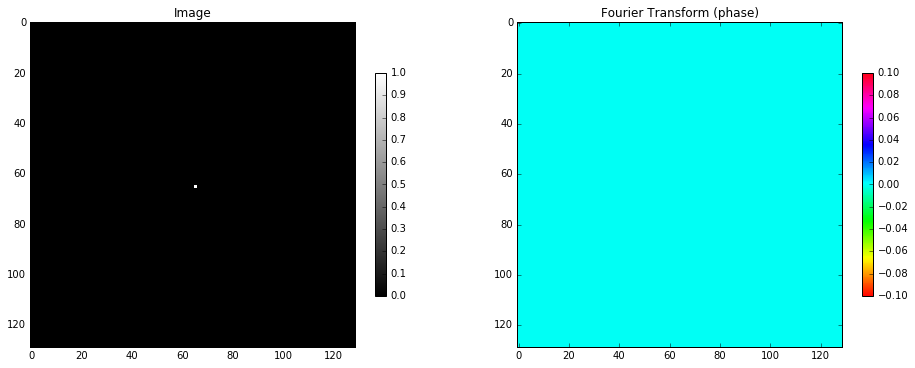

In [9]:
def pointSourceFFT(imgSize, ypos, xpos, amp=1.):
    img = np.zeros((imgSize+1, imgSize+1)) #odd sized array such that there is a central pixel
    img[ypos, xpos] = amp #make the central pixel have an intensity of 1
    fftImg = np.fft.fft2(np.fft.fftshift(img)) #compute the Fourier transform of the image
    
    fig, axes = plt.subplots(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.title('Image')
    plt.imshow(img, interpolation='nearest')
    plt.set_cmap('gray')
    plt.colorbar(shrink=0.5)
    
    plt.subplot(1,2,2)
    plt.title('Fourier Transform (phase)')
    plt.imshow(np.angle(fftImg))
    plt.set_cmap('hsv')
    plt.colorbar(shrink=0.5)
    
    #amplitudes are all 1.
    print 'FFT Max:', np.max(np.abs(fftImg)), 'Min:', np.min(np.abs(fftImg))

imgSize = 128
pointSourceFFT(imgSize, (imgSize/2)+1, (imgSize/2)+1)

*Left: a point source image, a simple image of a the centre pixel with intensity 1. Right: the spatial frequency phase of the point source image, all the phases are zero because the source is exactly in the middle of the image.*

An image with a single intensity pixel in the centre is equivalent to a 2-dimensional boxcar function with a width the size of the pixel, as the number of pixels in the image increases this approaches a delta function. The Fourier Transform of a delta function is a flat field of constants value as can be seen by printing the maximum and minimum amplitudes, they are all one. When the pixel is at the centre of the image the phase is also flat, but as the position of the pixel is changed the phase will show a *fringe pattern* related to the position. Moving the source position by a single pixel to the left by one pixel the amplitude remains the same but now a fringe pattern appears left to right across the phase.

FFT Max: 1.0 Min: 1.0


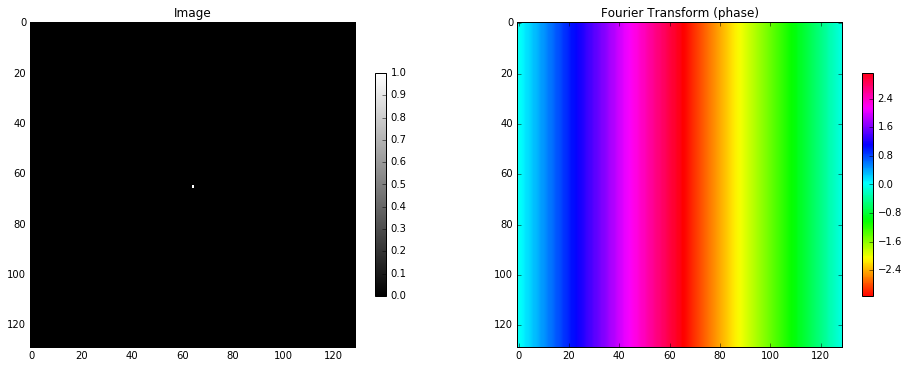

In [10]:
imgSize = 128
pointSourceFFT(imgSize, (imgSize/2)+1, (imgSize/2))

*Left: a point source image, a simple image of a pixel with intensity 1, offset from the centre by one pixel to the left. Right: the spatial frequency phase of the point source image.*

From the phase plot we see that the phase is constant in $y$ with respect to the a fixed $x$ position, and rotates around the unit circle once in the $x$ direction.

Instead, moving the position one pixel up from the centre the fringe pattern is now top to bottom.

FFT Max: 1.0 Min: 1.0


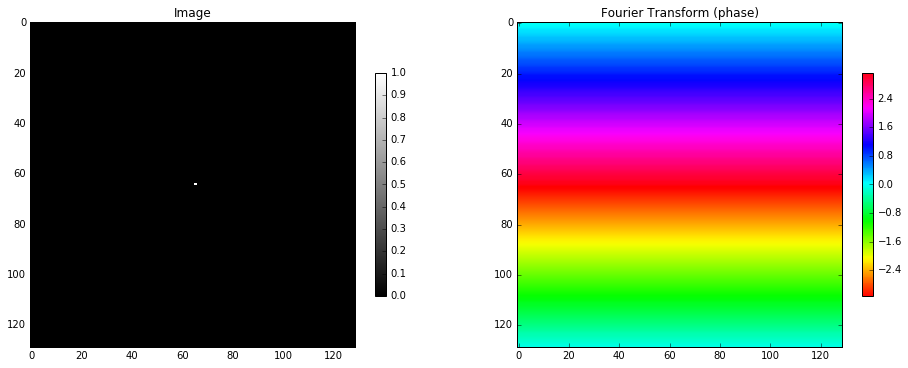

In [11]:
imgSize = 128
pointSourceFFT(imgSize, imgSize/2, (imgSize/2)+1)

*Left: a point source image, a simple image of a pixel with intensity 1, offset from the centre by one pixel up. Right: the spatial frequency phase of the point source image.*

With the past three examples the minimum and maximum amplitudes have remained the same but we see different phase plots. The direction of the phase indicates the position of the point source relative to the centre of the image. Now we will see that by moving the point source away from the centre the phase frequency will increase.

In [ ]:
imgSize = 128
pointSourceFFT(imgSize, (imgSize/2)+1 - 10, (imgSize/2)+1) #offset the point source 10 pixels north above the centre

pointSourceFFT(imgSize, (imgSize/2)+1 - 20, (imgSize/2)+1) #offset the point source 20 pixels north above the centre

pointSourceFFT(imgSize, (imgSize/2)+1 - 30, (imgSize/2)+1) #offset the point source 30 pixels north above the centre

pointSourceFFT(imgSize, (imgSize/2)+1 - 40, (imgSize/2)+1) #offset the point source 40 pixels north above the centre

*Left: a point source image, a simple image of a pixel with intensity 1, progressively offset from the centre. Right: the spatial frequency phase of the point source image.*

The further the point source is from the centre the faster the phase rotates, one would also say thethat the fringe frequency increases.

By fixing the distance of the point source to the phase centre but rotation the position around a circle we see that the frequency does not change but the direction of the fringe changes. Note, the circle is drawn on the plot for reference, but is not part of the image.

In [ ]:
def pointSourceFFTCircle(imgSize, ypos, xpos, amp=1., radius=10.):
    img = np.zeros((imgSize+1, imgSize+1)) #odd sized array such that there is a central pixel
    img[ypos, xpos] = amp #make the central pixel have an intensity of 1
    fftImg = np.fft.fft2(np.fft.fftshift(img)) #compute the Fourier transform of the image
 
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1, 2, 1)
    plt.title('Image')
    c = plt.Circle(((imgSize/2)+1, (imgSize/2)+1), radius, color='blue', linewidth=1, fill=False)
    ax.add_patch(c)
    plt.imshow(img, interpolation='nearest')
    plt.set_cmap('gray')
    plt.colorbar(shrink=0.5)
    
    ax = fig.add_subplot(1, 2, 2)
    plt.title('Fourier Transform (phase)')
    plt.imshow(np.angle(fftImg))
    plt.set_cmap('hsv')
    plt.colorbar(shrink=0.5)
    
    #amplitudes are all 1.
    print 'FFT Max:', np.max(np.abs(fftImg)), 'Min:', np.min(np.abs(fftImg))

imgSize = 128
pointSourceFFTCircle(imgSize, (imgSize/2)+1 - 10, (imgSize/2)+1 - 0, amp=1., radius=10.)

pointSourceFFTCircle(imgSize, (imgSize/2)+1 - 7, (imgSize/2)+1 - 7, amp=1.,radius=10.)

pointSourceFFTCircle(imgSize, (imgSize/2)+1 - 0, (imgSize/2)+1 - 10, amp=1.,radius=10.)

pointSourceFFTCircle(imgSize, (imgSize/2)+1 + 7, (imgSize/2)+1 - 7, amp=1.,radius=10.)

pointSourceFFTCircle(imgSize, (imgSize/2)+1 + 10, (imgSize/2)+1 - 0, amp=1.,radius=10.)

*Left: a point source image, a simple image of a pixel with intensity 1, rotated around a 10 pixel radius circle. The blue circle is plotted for reference. Right: the spatial frequency phase of the point source image.*

In the top plot where the point source is 10 pixels above the centre has a similar phase plot to that of the last figure where the source is 10 pixels below the centre, but looking carefully the phase is rotating in the opposite direction. For every point in the image there is another point which makes up a conjugated pair.

Now from these simple image examples we can see something about how sparsity works in different domains. In the image domain a single point source can be described by only a position and intensity value, i.e. we would say the image is sparse. But, transforming that image in the spatial frequency domain means that we now need to know the phase and amplitude of every pixel. That is, the information has been spread out over every pixel, in the spatial frequency domain the point source signal is now dense. This comes about because a true point-source, i.e. a delta function, can only be reconstructed by an infinite set of complex wave. We have been cheating a bit here by using a point source which actually has a size in these examples. That is, the point source has a size which is a pixel in lenght in the $x$ and $y$ direction.

As a hint about what lays in store, if we know that the signal we are interested in is mostly point source-like then we know that the signal will be spread across the spatial frequency domain and we don't need to know exactly where that signal is. We don't even need to fully measure the spatial frequency domain if we make assumptions about what the source is to reconstruct the the image of the sky we are interested in. But, this is for later.

#### 5.1.4 The Fourier Transform of Two Point Sources<a id='imaging:sec:ft2Point'></a>

Now that we have looked at the simple case of a single point source image and how moving that source around the image changes the visibilities, we will get a bit more complex by introducing a second point source. A small step, but that is what we need at the moment.

The spatial frequency phases of two point sources, each with unity amplitude, is the average of the phases of each individual point source.

In [ ]:
def multipleSourcesFFT(imgSize, pos, amp):
    img = np.zeros((imgSize+1, imgSize+1)) #odd sized array such that there is a central pixel
    for p,a in zip(pos, amp):
        img[p[0], p[1]] = a #make the central pixel have an intensity of 1
    
    fftImg = np.fft.fft2(np.fft.fftshift(img)) #compute the Fourier transform of the image
    
    fig, axes = plt.subplots(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.title('Image')
    plt.imshow(img, interpolation='nearest')
    plt.set_cmap('gray')
    plt.colorbar(shrink=0.5)
    
    plt.subplot(1,2,2)
    plt.title('Fourier Transform (phase)')
    plt.imshow(np.angle(fftImg))
    plt.set_cmap('hsv')
    plt.colorbar(shrink=0.5)
    
    #amplitudes are all 1.
    print 'FFT Max:', np.max(np.abs(fftImg)), 'Min:', np.min(np.abs(fftImg))

imgSize = 128

multipleSourcesFFT(imgSize, [[64, 65], [90,65]], [1., 1.])

multipleSourcesFFT(imgSize, [[65, 64], [65,80]], [1., 1.])

multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 1.])

*Left: position of two point sources, each with an amplitude of 1. Right: the resulting spatial frequency phases.*

From these figures we can see there are two different sine waves in the phase plots, The first is a slowly varying wave going top to bottom due to the source near the centre of the image. The second wave changes frequency and direction based on the position of the second source. From the first row we can see that because the sources are aligned in $x$, then the phase of both goes top to bottom, but at different frequencies. Similarly, in the second row, the sources are aligned in $y$ and thus both phases go left to right. In the third row we see that the phase is at an angle because of the second source position.

Now, the phases are not added equally, the average phase value at each spatial frequency is a weighted average of each source based on the amplitude of that source. In the previous examples both sources had the same amplitude so the phases were simply an average.

In [ ]:
imgSize = 128

multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 0.1])
multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 1.0])
multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 10.])

*Left: two point sources at fixed positions with the central source having unity amplitude and the further out source having an amplitude of 0.1, 1, 10 for each row. Right: the resulting phases which are an amplitude weighted average of the phases of each individual source.*

Once we start including more than two sources in the image we can see the resulting spatial frequency plots can become very complex.

In [ ]:
multipleSourcesFFT(imgSize, [[64,65], [90,80], [40,10], [60,50], [20,80]], [.2, 0.3, 0.5, 0.1, 0.7])

*Left: five point sources at fixed positions with the central source having an amplitude of $0.2$ and the further out sources having an amplitude of $0.3$, $0.5$, $0.1$, and $0.7$. Right: the resulting phases which are an amplitude weighted average of the phases of each individual source.*

### 5.1.5 Building up an image from Sampled Visibilities<a id='imaging:sec:ftsampVis'></a>

Now, since we stated at the beginning of this section that the spatial domain and spatial frequency domain are Fourier pairs we can think about these point source examples as a sampling in the spatial frequency (visibility) domain and the resulting Fourier transformed signal as an image using these sampling. This may sound odd, but let us use an example to show what this means.

Starting from the Fourier transformed duck image shown at the beginning of the section, we can construct a new image by selecting a few sample points with what is called a *sampling function* (more on this in the next section) in the spatial frequency domain and creating a new image.

In [ ]:
fftDuck = np.fft.fftshift(np.fft.fft2(gDuck))

def reconstructImage(vis, nsamples):
    """randomly select a few values from the spatial frequency (visibility) domain
    and reconstruct the image with those samples. To do a full reconstruction of the
    image, nsamples needs to be larger than the total number of pixels in the image
    because the np.random.randint() chooses with replacement so positions will be
    doubles counted"""
    subVis = np.zeros_like(vis)
    ypos = np.random.randint(0, vis.shape[0]-1, size=nsamples)
    xpos = np.random.randint(0, vis.shape[1]-1, size=nsamples)
    subVis[ypos, xpos] = vis[ypos, xpos] #insert a subset of visibilities
    newImg = np.abs(np.fft.ifft2(np.fft.fftshift(subVis)))
    
    fig, axes = plt.subplots(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.title('Sampled Visibilities')
    plt.imshow(np.abs(subVis).astype(bool), interpolation='nearest')
    plt.set_cmap('gray')
    
    plt.subplot(1,2,2)
    plt.title('Reconstructed Image')
    plt.imshow(newImg)
    plt.set_cmap('gray')

reconstructImage(fftDuck, 1e1)

reconstructImage(fftDuck, 1e3)

reconstructImage(fftDuck, 1e5)

reconstructImage(fftDuck, 1e6)

*Figures: the reconstructed images (right) using the spatial frequency domain sampled positions (left).*

By only using a few sampled spatial frequency modes the resulting image (top right) looks only like a collection of sine waves with random amplitudes and orientations. But, as we progressively increase the number of sampled positions the image becomes more complex until eventually the original duck image re-emerges. Basically, we are selecting a collection of spatial frequencies, giving them different amplitudes and creating an image out of those components, we just happen to be picking ones such that we are constructing a duck. But, any image can be constructed by setting the correct amplitudes and phases of various spatial frequencies.

In the final image we can see the visibility space is not fully samples, but since the majority of positions are sampled it is difficult to see any difference in the resulting image compared to the original. This is an important point, we don't need to sample all the spatial frequency modes to reconstruct an image that is very similar to the original. And this point leads us into the next section where we are faced with physical limits on the instruments we can build and how we construct images from interferometric visibilities.

***

Next: [5.2 Sampling and Point Spread Functions](5_2_sampling_functions_and_psfs.ipynb)